<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n250.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.130368,43.862329,43.036680,-0.000423,184.028954,184.022912,0.006042
1,0.0,1.0,32.230576,59.551627,44.025146,0.008013,145.815363,145.807179,0.008184
2,0.0,2.0,96.265953,42.961231,97.294365,0.012938,246.534486,246.518127,0.016359
3,0.0,3.0,87.981134,31.555272,32.686952,-0.030551,162.192807,162.214757,-0.021950
4,0.0,4.0,38.232695,63.493879,26.249310,0.005833,137.981716,137.974364,0.007352
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,67.360671,69.683673,31.700656,-0.003774,178.741227,178.745770,-0.004544
29996,999.0,26.0,87.562621,72.748979,87.233701,-0.001864,257.543438,257.546695,-0.003257
29997,999.0,27.0,44.723573,71.956699,90.392223,0.003597,217.076092,217.073011,0.003081
29998,999.0,28.0,88.258264,85.052318,37.396065,0.000490,220.707137,220.708429,-0.001292


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.130368,43.862329,43.036680,-0.000423,184.028954,184.022912,0.006042
1,0.0,1.0,32.230576,59.551627,44.025146,0.008013,145.815363,145.807179,0.008184
2,0.0,2.0,96.265953,42.961231,97.294365,0.012938,246.534486,246.518127,0.016359
3,0.0,3.0,87.981134,31.555272,32.686952,-0.030551,162.192807,162.214757,-0.021950
4,0.0,4.0,38.232695,63.493879,26.249310,0.005833,137.981716,137.974364,0.007352
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,67.360671,69.683673,31.700656,-0.003774,178.741227,178.745770,-0.004544
29996,999.0,26.0,87.562621,72.748979,87.233701,-0.001864,257.543438,257.546695,-0.003257
29997,999.0,27.0,44.723573,71.956699,90.392223,0.003597,217.076092,217.073011,0.003081
29998,999.0,28.0,88.258264,85.052318,37.396065,0.000490,220.707137,220.708429,-0.001292


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    87.130368  43.862329  43.036680  ...  184.028954  184.022912  0.006042
      1.0    32.230576  59.551627  44.025146  ...  145.815363  145.807179  0.008184
      2.0    96.265953  42.961231  97.294365  ...  246.534486  246.518127  0.016359
      3.0    87.981134  31.555272  32.686952  ...  162.192807  162.214757 -0.021950
      4.0    38.232695  63.493879  26.249310  ...  137.981716  137.974364  0.007352
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   67.360671  69.683673  31.700656  ...  178.741227  178.745770 -0.004544
      26.0   87.562621  72.748979  87.233701  ...  257.543438  257.546695 -0.003257
      27.0   44.723573  71.956699  90.392223  ...  217.076092  217.073011  0.003081
      28.0   88.258264  85.052318  37.396065  ...  220.707137  220.708429 -0.001292
      29.0   93.558112  37.084017  20.267785  ...  160.912609  160.909943  0.002666

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    87.130368  43.862329  43.036680  ...  184.028954  184.022912  0.006042
      1.0    32.230576  59.551627  44.025146  ...  145.815363  145.807179  0.008184
      2.0    96.265953  42.961231  97.294365  ...  246.534486  246.518127  0.016359
      3.0    87.981134  31.555272  32.686952  ...  162.192807  162.214757 -0.021950
      4.0    38.232695  63.493879  26.249310  ...  137.981716  137.974364  0.007352
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   67.360671  69.683673  31.700656  ...  178.741227  178.745770 -0.004544
      26.0   87.562621  72.748979  87.233701  ...  257.543438  257.546695 -0.003257
      27.0   44.723573  71.956699  90.392223  ...  217.076092  217.073011  0.003081
      28.0   88.258264  85.052318  37.396065  ...  220.707137  220.708429 -0.001292
      29.0   93.558112  37.084017  20.267785  ...  160.912609  160.909943  0.002666

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.130368,43.862329,43.036680,-0.000423,184.028954,184.022912,0.006042
1,0.0,1.0,32.230576,59.551627,44.025146,0.008013,145.815363,145.807179,0.008184
2,0.0,2.0,96.265953,42.961231,97.294365,0.012938,246.534486,246.518127,0.016359
3,0.0,3.0,87.981134,31.555272,32.686952,-0.030551,162.192807,162.214757,-0.021950
4,0.0,4.0,38.232695,63.493879,26.249310,0.005833,137.981716,137.974364,0.007352
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,67.360671,69.683673,31.700656,-0.003774,178.741227,178.745770,-0.004544
29996,999.0,26.0,87.562621,72.748979,87.233701,-0.001864,257.543438,257.546695,-0.003257
29997,999.0,27.0,44.723573,71.956699,90.392223,0.003597,217.076092,217.073011,0.003081
29998,999.0,28.0,88.258264,85.052318,37.396065,0.000490,220.707137,220.708429,-0.001292


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    87.130368  43.862329  43.036680  ...  184.028954  184.022912  0.006042
      1.0    32.230576  59.551627  44.025146  ...  145.815363  145.807179  0.008184
      2.0    96.265953  42.961231  97.294365  ...  246.534486  246.518127  0.016359
      3.0    87.981134  31.555272  32.686952  ...  162.192807  162.214757 -0.021950
      4.0    38.232695  63.493879  26.249310  ...  137.981716  137.974364  0.007352
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   67.360671  69.683673  31.700656  ...  178.741227  178.745770 -0.004544
      26.0   87.562621  72.748979  87.233701  ...  257.543438  257.546695 -0.003257
      27.0   44.723573  71.956699  90.392223  ...  217.076092  217.073011  0.003081
      28.0   88.258264  85.052318  37.396065  ...  220.707137  220.708429 -0.001292
      29.0   93.558112  37.084017  20.267785  ...  160.912609  160.909943  0.002666

[30000 rows x 7 columns]

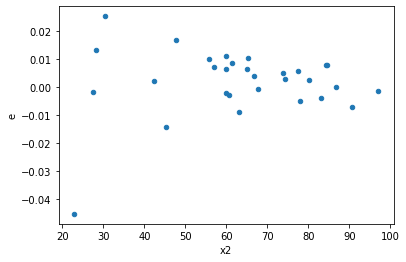

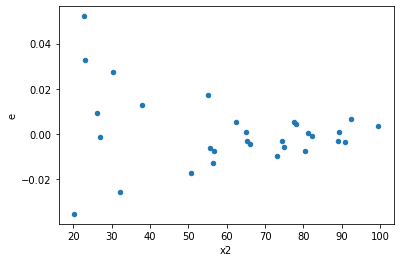

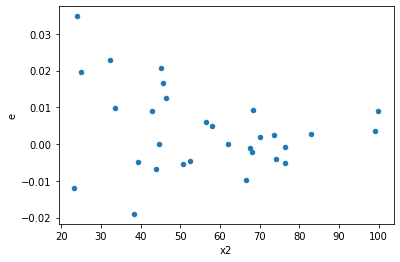

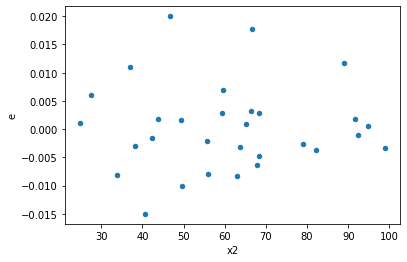

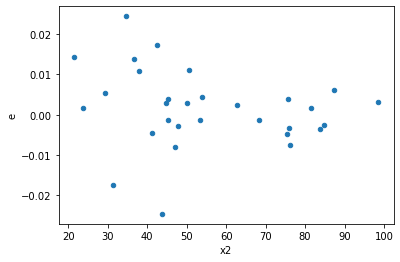

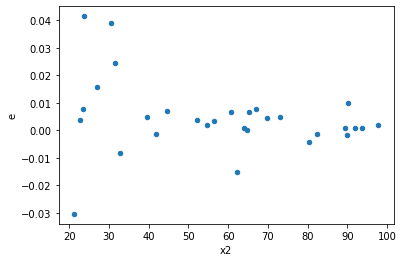

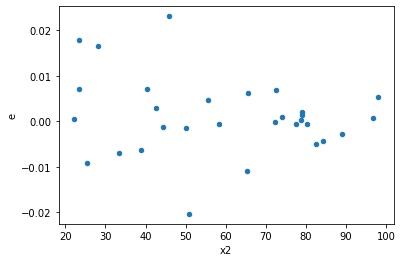

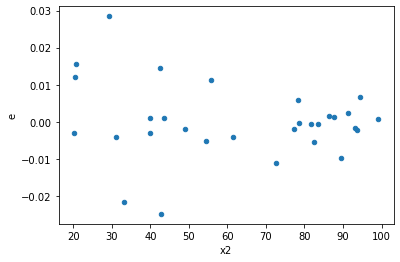

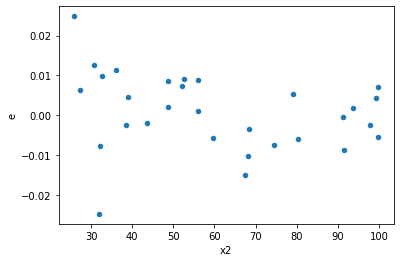

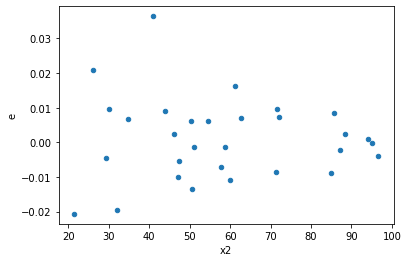

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
23.0,9.0,9.0,0.00022166386854007662,0.0003030333646969226,2.462931872667518e-05,3.367037385521362e-05,1.367085067551884,0.6488929828903394,0.6755535085548303,0.3244464914451697,Reject005=1 : Homoscedasticity
91.0,9.0,9.0,0.0003966545573688911,0.00039935270523416464,4.407272859654346e-05,4.437252280379607e-05,1.0068022610988538,0.9921084021991677,0.5039457989004161,0.49605420109958387,Reject005=1 : Homoscedasticity
102.0,9.0,9.0,0.00034484062658877247,0.0003664642221958593,3.831562517653028e-05,4.0718246910651036e-05,1.0627060558988988,0.9292989254156601,0.53535053729217,0.46464946270783003,Reject005=1 : Homoscedasticity
135.0,9.0,9.0,0.00021996533030597254,0.00035640298123650765,2.444059225621917e-05,3.960033124850085e-05,1.6202688884686958,0.48341374903998613,0.7582931254800069,0.24170687451999306,Reject005=1 : Homoscedasticity
206.0,9.0,9.0,0.00042272906241570335,0.0004306141332319912,4.696989582396704e-05,4.784601480355458e-05,1.018652776724714,0.9784889972256599,0.5107555013871701,0.4892444986128299,Reject005=1 : Homoscedasticity
422.0,9.0,9.0,0.00030723805324178553,0.0007201920368796991,3.4137561471309505e-05,8.002133743107768e-05,2.3440847553897672,0.22043647762665208,0.889781761186674,0.11021823881332604,Reject005=1 : Homoscedasticity
471.0,9.0,9.0,0.00028978280728370374,0.00038532679347892456,3.2198089698189305e-05,4.281408816432495e-05,1.329708953718849,0.6780878141831861,0.660956092908407,0.33904390709159304,Reject005=1 : Homoscedasticity
828.0,9.0,9.0,0.0007683127050017001,0.0007696928426559995,8.536807833352223e-05,8.552142696177772e-05,1.0017963228322462,0.9979107705302543,0.5010446147348728,0.49895538526512717,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.0010732379658670455,0.0003171577987940047,0.00011924866287411617,3.523975542155608e-05,0.29551488941017834,0.08378359268261328,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,0.0044312279686421875,0.00021656707914829662,0.0004923586631824652,2.406300879425518e-05,0.04887292657494598,0.00011765863860190491,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,0.0007185944076432304,0.00019850717814337863,7.984382307147004e-05,2.205635312704207e-05,0.27624370024590283,0.06885764976524693,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,0.0004924249633987403,0.00046006534746949844,5.471388482208226e-05,5.111837194105538e-05,0.9342851838666052,0.9210085401408136,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,0.002394081660148859,0.00010991804395997444,0.0002660090733498732,1.2213115995552715e-05,0.04591240382048621,9.067733190188225e-05,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,0.0005347323073131528,0.00011728847931107814,5.9414700812572535e-05,1.3032053256786459e-05,0.2193405517246801,0.03384475041457287,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,0.0011223785026847845,0.0002508347139708037,0.00012470872252053162,2.7870523774533747e-05,0.22348495928137857,0.035930074020995205,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,0.0015709497295344258,0.0002940505707220533,0.00017454996994826954,3.26722856357837e-05,0.1871801275329157,0.020109443843225012,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,0.00081285704086783,0.00027954455189739286,9.031744898531445e-05,3.1060505766376985e-05,0.3439037098072533,0.12762023749662207,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    815
Reject005=1 : Homoscedasticity      185
Name: Result_test, dtype: int64